# Project: TMDB 's Movies Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Explore Data with visuals</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

>my scope in this project to analyze <b>TMDb-movies dataset</b> which provides information about movies published on TMDB web portal in terms of year of realese, runtime, pupolarity, cost and profit.

>the dataset provides information about movie's budget and movie's revenue withtaking into consideration the inflation  

> i'm goint to study the nature of the count of movies on the IMDB portal with respect to the budget(cost) to explore the vote rate and the revenue
<b>Questions:</b>
<br> Q1)  what is the change happend on the revenues during  years?
<br> Q2) what is the result of comparing the distribution of revenues and the vote average  in the movies with lowest budget and  the movies with highest budget?



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>

## Data Wrangling

### Gather Data

In [58]:
# Read the dataset and analysis its data 
df=pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [59]:
# array size?
df.shape

(10866, 21)

In [60]:
# discover its datatypes and existing  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [61]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

### Clean Data 

#### Drop columns
>drop unneccessary columns in my data analysis 

In [62]:
df.drop(['id','imdb_id','homepage','cast','production_companies','keywords','tagline','overview','budget','revenue'],axis=1,inplace=True)

#### Reorder columns
>reorder the columns in appropriate order

In [63]:
movie_columns = ['release_year','original_title','release_date','runtime','popularity','vote_count','vote_average','budget_adj','revenue_adj','genres','director']
df = df.reindex(columns=movie_columns)

#### Null Values Handling
>decide what will be the best decision to handle the coulmns with null values in the dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
release_year      10866 non-null int64
original_title    10866 non-null object
release_date      10866 non-null object
runtime           10866 non-null int64
popularity        10866 non-null float64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
genres            10843 non-null object
director          10822 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [65]:
df[df['genres'].isnull()].shape

(23, 11)

In [66]:
df[df['director'].isnull()].shape

(44, 11)

> i decide not to delete these row or make any manipulation in its data since will not affect on my exploration 

In [67]:
#df_NoNull =df.dropna(axis=0,how='any')

In [68]:
#df_NoNull.shape

In [69]:
#df_NoNull.head()

<a id='eda'></a>
## Explore Data with visuals

In [70]:
df.describe()

release_year       runtime    popularity    vote_count  vote_average  \
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean    2001.322658    102.070863      0.646441    217.389748      5.974922   
std       12.812941     31.381405      1.000185    575.619058      0.935142   
min     1960.000000      0.000000      0.000065     10.000000      1.500000   
25%     1995.000000     90.000000      0.207583     17.000000      5.400000   
50%     2006.000000     99.000000      0.383856     38.000000      6.000000   
75%     2011.000000    111.000000      0.713817    145.750000      6.600000   
max     2015.000000    900.000000     32.985763   9767.000000      9.200000   

         budget_adj   revenue_adj  
count  1.086600e+04  1.086600e+04  
mean   1.755104e+07  5.136436e+07  
std    3.430616e+07  1.446325e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.085325e+07  3.369710e+07  
max    4.250000e+08  2.827124e+09

### Q1)  what is the change happend on the revenues during  years?

In [71]:
 df_new = df.groupby('release_year').revenue_adj.mean()
df_new.head(5)

release_year
1960    3.340991e+07
1961    7.947167e+07
1962    4.856238e+07
1963    3.924580e+07
1964    5.707603e+07
Name: revenue_adj, dtype: float64

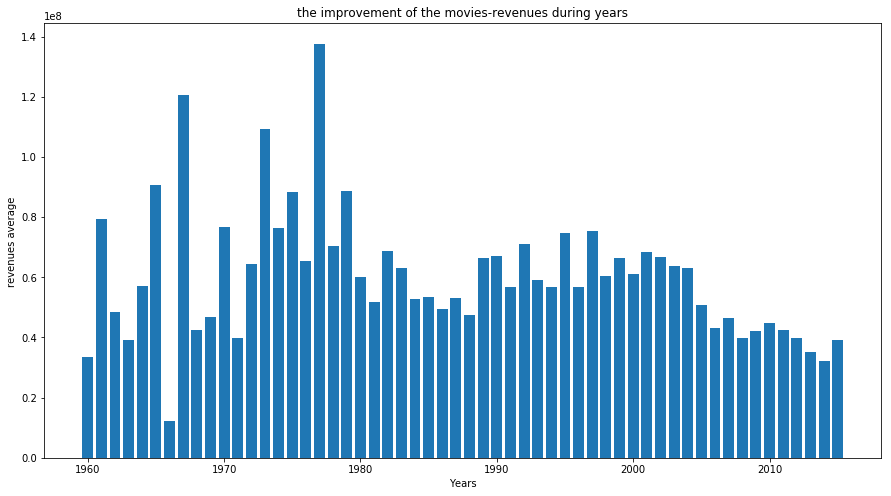

In [72]:
plt.subplots(figsize=(15, 8))
plt.bar(df_new.index, df_new)
plt.title('the improvement of the movies-revenues during years')
plt.xlabel('Years')
plt.ylabel('revenues average ');

###  Q2) what is the result of comparing the distribution of the vote average and revenues  in the movies with lowest budget and  the movies with highest budget?

In [73]:
df['budget_adj'].mean()

17551039.82288678

>  gonna create two datasets one contains movies with budget (_adj)  geater than 15 millions and the second contains movies with budget(_adj) greater than 15 millions.
Note: as consider that the currency of the buget value in each movie is the same.

In [74]:
df_g15M = df[df['budget_adj']>=15000000]
df_l15M = df[df['budget_adj']<15000000]

In [75]:
print(df_g15M.shape)
print(df_l15M.shape)

(3191, 11)
(7675, 11)


In [76]:
print(df_g15M.describe())
print(df_l15M.describe())

       release_year      runtime   popularity   vote_count  vote_average  \
count   3191.000000  3191.000000  3191.000000  3191.000000   3191.000000   
mean    2000.734879   112.352867     1.254597   570.913507      6.109872   
std       11.015175    23.718362     1.559700   935.854467      0.802867   
min     1960.000000    28.000000     0.010335    10.000000      2.200000   
25%     1995.000000    97.000000     0.482106    74.000000      5.600000   
50%     2003.000000   108.000000     0.848086   220.000000      6.100000   
75%     2009.000000   123.000000     1.461336   620.000000      6.600000   
max     2015.000000   540.000000    32.985763  9767.000000      8.400000   

         budget_adj   revenue_adj  
count  3.191000e+03  3.191000e+03  
mean   5.596846e+07  1.520210e+08  
std    4.346034e+07  2.308580e+08  
min    1.500000e+07  0.000000e+00  
25%    2.570920e+07  1.959037e+07  
50%    4.054332e+07  7.303063e+07  
75%    7.173005e+07  1.852731e+08  
max    4.250000e+08  2.8271

In [77]:
df_l15M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7675 entries, 12 to 10865
Data columns (total 11 columns):
release_year      7675 non-null int64
original_title    7675 non-null object
release_date      7675 non-null object
runtime           7675 non-null int64
popularity        7675 non-null float64
vote_count        7675 non-null int64
vote_average      7675 non-null float64
budget_adj        7675 non-null float64
revenue_adj       7675 non-null float64
genres            7652 non-null object
director          7631 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 719.5+ KB


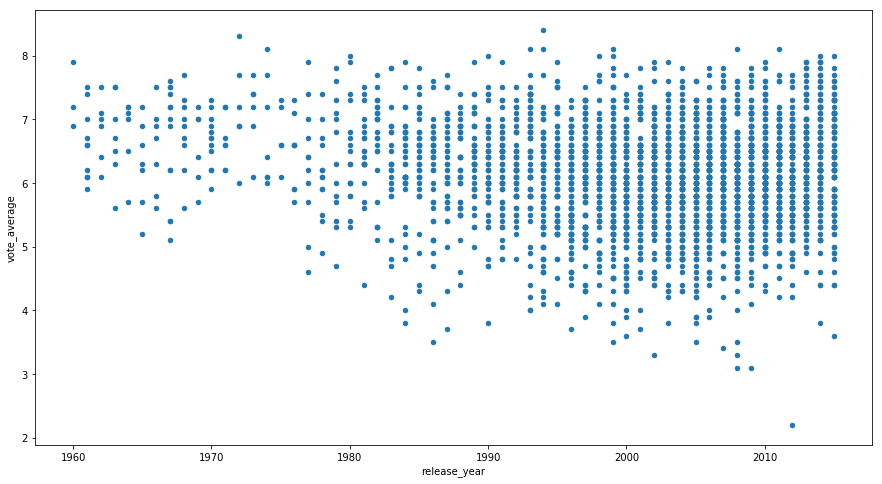

In [78]:
df_g15M.plot(x='release_year',y='vote_average',kind='scatter',figsize=(15,8));

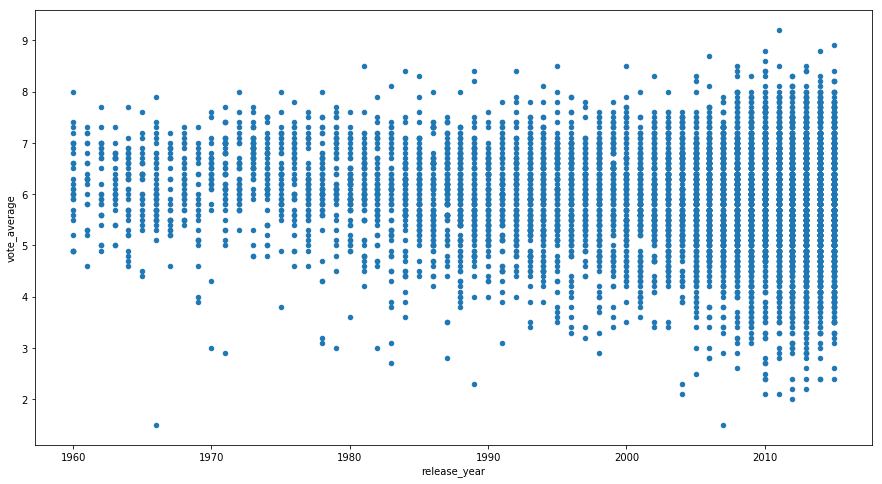

In [79]:
df_l15M.plot(x='release_year',y='vote_average',kind='scatter',figsize=(15,8));

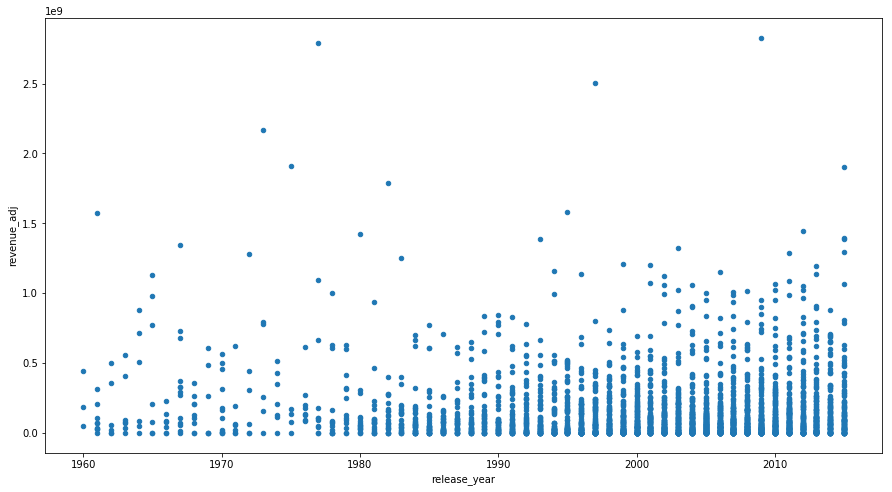

In [80]:
df_g15M.plot(x='release_year',y='revenue_adj',kind='scatter',figsize=(15,8));

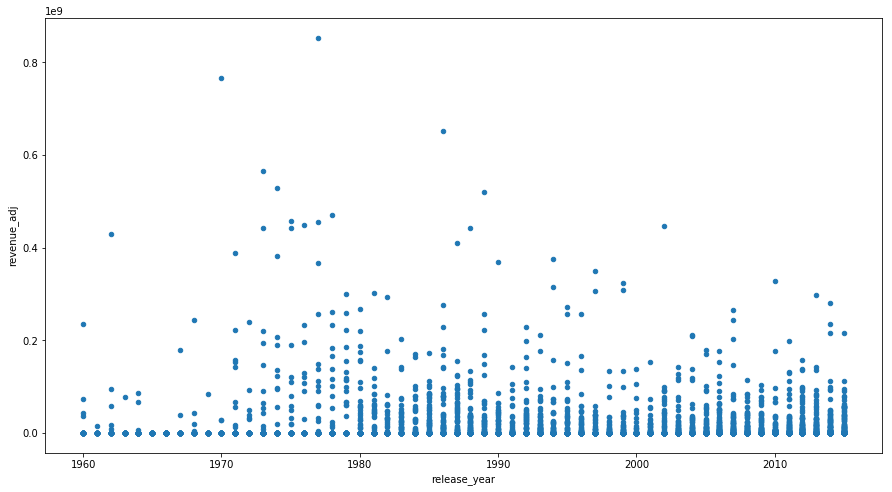

In [81]:
df_l15M.plot(x='release_year',y='revenue_adj',kind='scatter',figsize=(15,8));

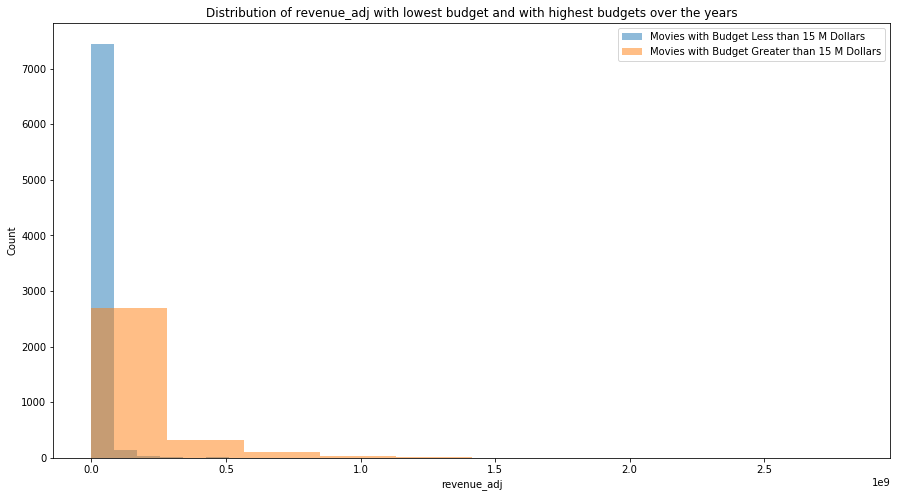

In [85]:

fig,ax = plt.subplots(figsize=(15,8))
ax.hist(df_l15M['revenue_adj'],alpha=0.5,label="Movies with Budget Less than 15 M Dollars")
ax.hist(df_g15M['revenue_adj'],alpha=0.5,label="Movies with Budget Greater than 15 M Dollars")
ax.set_title('Distribution of revenue_adj with lowest budget and with highest budgets over the years')
ax.set_xlabel('revenue_adj')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

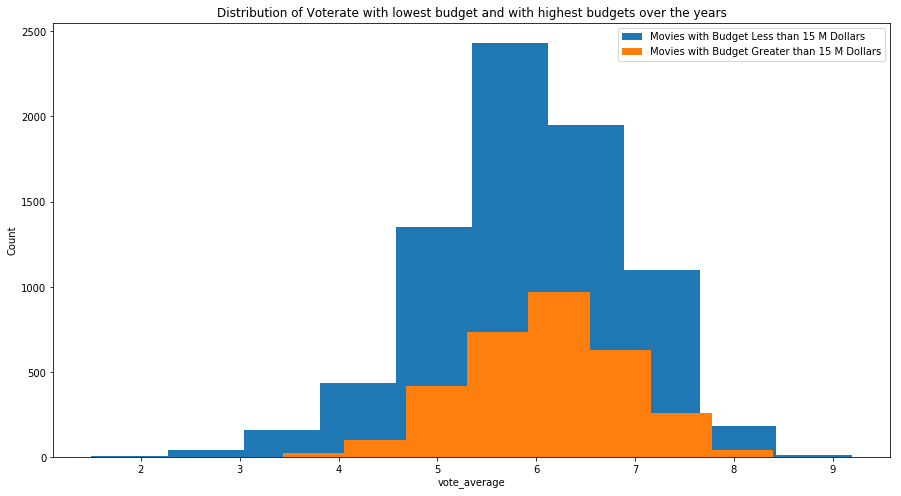

In [86]:
fig,ax = plt.subplots(figsize=(15,8))
ax.hist(df_l15M['vote_average'],alpha=1,label="Movies with Budget Less than 15 M Dollars")
ax.hist(df_g15M['vote_average'],alpha=1,label="Movies with Budget Greater than 15 M Dollars")
ax.set_title('Distribution of Voterate with lowest budget and with highest budgets over the years')
ax.set_xlabel('vote_average')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

<a id='conclusions'></a>
## Conclusions
> from graph for Q1, we could conclude that the revenues of years not in incremental rate but there are years accoplish revenues less than its previous years 
>from graph for Q2 you could conclude that portal conatins count of movies with lowest budget in double of count of movies with the highest budget nearly and despite of that the higest budget movies accomplish the highest revenues and the highest vote rate 

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0